## Performing Exploratory Data Analysis for Student Retention

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats

from tools.utils import combine_columns, compute_feature_importance

In [2]:
# Load in cleaned data
data = pd.read_csv("data/Most-Recent-Cohorts-Institution-filtered.csv")
data = data.drop('Unnamed: 0', axis=1)

In [3]:
four_yr_retention = data.RET_FT4
less_four_yr_retention = data.RET_FTL4

## In-state and Out-state tuition

In [4]:
# data only with tuition fee of in state and out state, four-year institutions and less than four-year institutions
tuition_data = data[['RET_FT4', 'RET_FTL4', 'TUITIONFEE_IN','TUITIONFEE_OUT']]
tuition_data.head()

,RET_FT4,RET_FTL4,TUITIONFEE_IN,TUITIONFEE_OUT
0,0.5403,NaN,10024.0,18634.0
1,0.8640,NaN,8568.0,20400.0
2,0.5000,NaN,6950.0,6950.0
3,0.8180,NaN,11338.0,23734.0
4,0.6202,NaN,11068.0,19396.0


First, we can take a look at what difference in the distribution between in-state and out-state tuition.

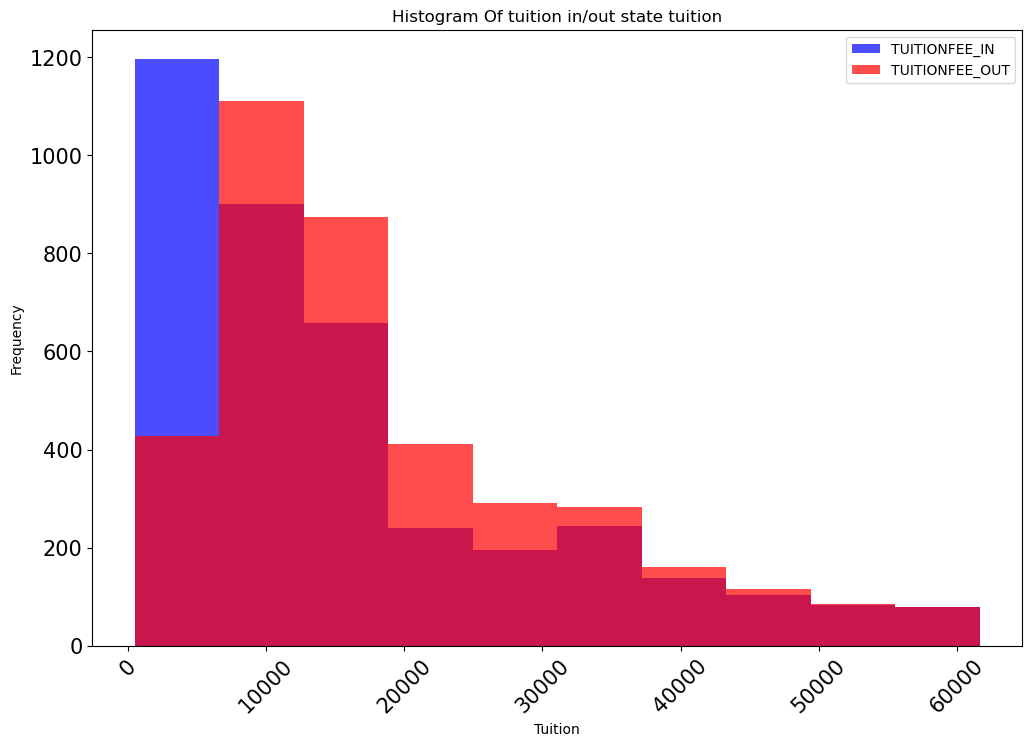

In [5]:
tuition_data_inout = tuition_data[['TUITIONFEE_IN','TUITIONFEE_OUT']]
tuition_data_inout.plot(kind='hist',
        alpha=0.7,
        title='Histogram Of tuition in/out state tuition',
        rot=45,
        figsize=(12,8),
        fontsize=15, 
        color=['blue', 'r'])
plt.xlabel('Tuition');

plt.show()

From the Histogram above, in state more concentrated in the low cost segment. And more people are out of state than in state in every range except 0 to 5,000. It can be seen that students out of state need to pay more fees than those in state. The same conclusion can be found when we directly compare the mean and median of students in state and out state, that is, both the mean and median of students in out state are higher than those in state.

After looking at the difference in distribution between in state tuition & fee and out state tuition & fee, we can analysis them combine with retention rate. And take a look at if in/out state tuition&fee affect retention rate.

In [6]:
in_FT4 = data[['RET_FT4', 'TUITIONFEE_IN']]
in_FTL4 = data[['RET_FTL4', 'TUITIONFEE_IN']]
out_FT4 = data[['RET_FT4', 'TUITIONFEE_OUT']]
out_FTL4 = data[['RET_FTL4', 'TUITIONFEE_OUT']]

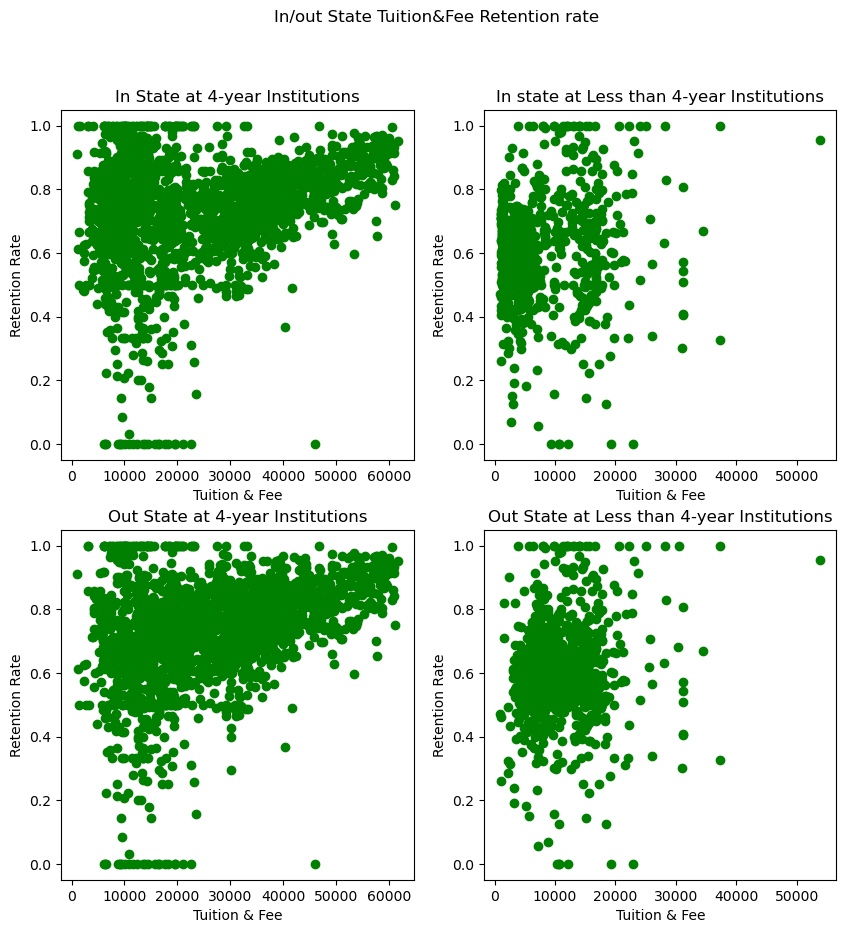

In [7]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(10,10))
fig.suptitle('In/out State Tuition&Fee Retention rate')

# make a graph for in state tuition & fee and 4 year institutions
ax1.set_title('In State at 4-year Institutions')
ax1.set_xlabel('Tuition & Fee')
ax1.set_ylabel('Retention Rate')
ax1.scatter(in_FT4.TUITIONFEE_IN, in_FT4.RET_FT4,color ='green')

# make a graph for in state tuition & fee and less than 4 year institutions
ax2.set_title('In state at Less than 4-year Institutions')
ax2.set_xlabel('Tuition & Fee')
ax2.set_ylabel('Retention Rate')
ax2.scatter(in_FTL4.TUITIONFEE_IN, in_FTL4.RET_FTL4,color ='green')

# make a graph for out state tuition & fee and 4 year institutions
ax3.set_title('Out State at 4-year Institutions')
ax3.set_xlabel('Tuition & Fee')
ax3.set_ylabel('Retention Rate')
ax3.scatter(out_FT4.TUITIONFEE_OUT, out_FT4.RET_FT4,color ='green')

# make a graph for out state tuition & fee and less than 4 year institutions
ax4.set_title('Out State at Less than 4-year Institutions')
ax4.set_xlabel('Tuition & Fee')
ax4.set_ylabel('Retention Rate')
ax4.scatter(out_FTL4.TUITIONFEE_OUT, out_FTL4.RET_FTL4,color ='green')

plt.show()

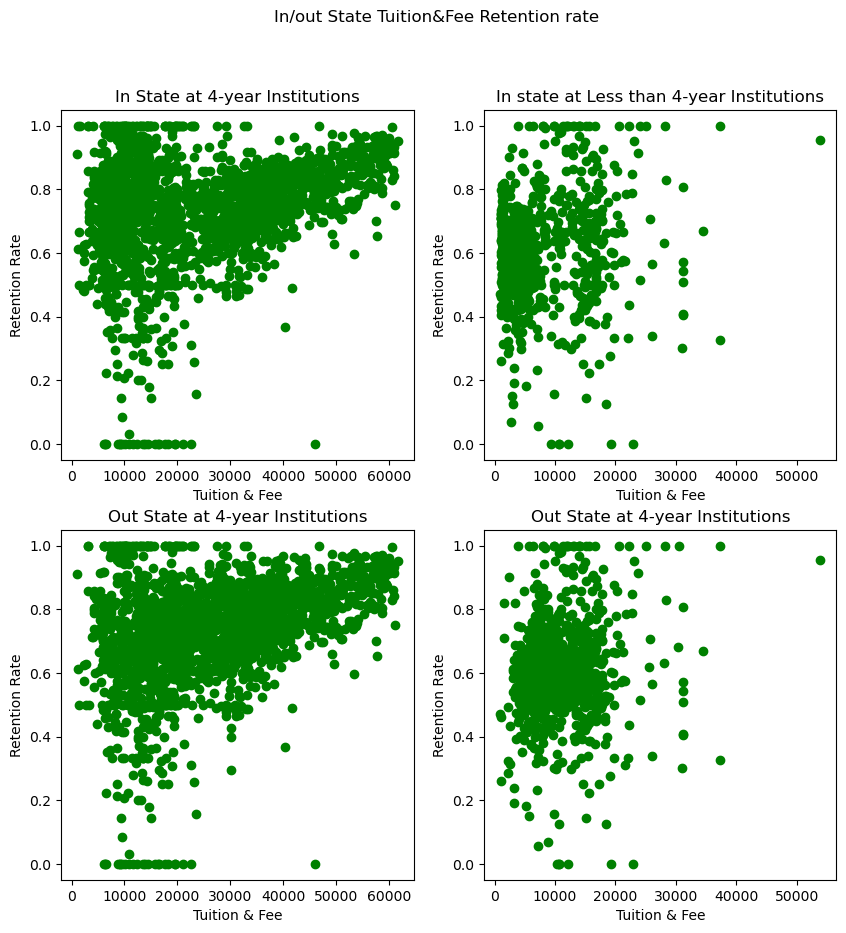

In [8]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(10,10))
fig.suptitle('In/out State Tuition&Fee Retention rate')

#
ax1.set_title('In State at 4-year Institutions')
ax1.set_xlabel('Tuition & Fee')
ax1.set_ylabel('Retention Rate')
ax1.scatter(in_FT4.TUITIONFEE_IN, in_FT4.RET_FT4,color ='green')

#
ax2.set_title('In state at Less than 4-year Institutions')
ax2.set_xlabel('Tuition & Fee')
ax2.set_ylabel('Retention Rate')
ax2.scatter(in_FTL4.TUITIONFEE_IN, in_FTL4.RET_FTL4,color ='green')

#
ax3.set_title('Out State at 4-year Institutions')
ax3.set_xlabel('Tuition & Fee')
ax3.set_ylabel('Retention Rate')
ax3.scatter(out_FT4.TUITIONFEE_OUT, out_FT4.RET_FT4,color ='green')

#
ax4.set_title('Out State at 4-year Institutions')
ax4.set_xlabel('Tuition & Fee')
ax4.set_ylabel('Retention Rate')
ax4.scatter(out_FTL4.TUITIONFEE_OUT, out_FTL4.RET_FTL4,color ='green')

plt.show()

In [9]:
def standard_units(col):
    "Convert any column to standard units."
    return (col - np.mean(col))/np.std(col) 

In [10]:
standard_tuition_data = tuition_data.assign(standard_RET_FT4=standard_units(tuition_data.RET_FT4),
                       standard_RET_FTL4=standard_units(tuition_data.RET_FTL4),
                       standard_TUI_IN=standard_units(tuition_data.TUITIONFEE_IN),
                       standard_TUI_OUT=standard_units(tuition_data.TUITIONFEE_OUT))
standard_tuition_data

,RET_FT4,RET_FTL4,TUITIONFEE_IN,TUITIONFEE_OUT,standard_RET_FT4,standard_RET_FTL4,standard_TUI_IN,standard_TUI_OUT
0,0.5403,NaN,10024.0,18634.0,-1.139438,NaN,-0.422876,-0.038961
1,0.8640,NaN,8568.0,20400.0,0.794970,NaN,-0.526098,0.095119
2,0.5000,NaN,6950.0,6950.0,-1.380268,NaN,-0.640805,-0.926044
3,0.8180,NaN,11338.0,23734.0,0.520077,NaN,-0.329721,0.348246
4,0.6202,NaN,11068.0,19396.0,-0.661961,NaN,-0.348862,0.018892
...,...,...,...,...,...,...,...,...
6676,NaN,NaN,13604.0,22196.0,NaN,NaN,-0.169074,0.231476
6677,NaN,NaN,14486.0,23476.0,NaN,NaN,-0.106546,0.328658
6678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6679,NaN,NaN,15216.0,24926.0,NaN,NaN,-0.054793,0.438746


In [11]:
# 4-year in state
r_4_in_state = np.mean(standard_tuition_data.standard_RET_FT4 * standard_tuition_data.standard_TUI_IN)
# 4-year out state
r_4_out_state = np.mean(standard_tuition_data.standard_RET_FT4 * standard_tuition_data.standard_TUI_OUT)
# less than 4-year in state
r_less_4_in_state = np.mean(standard_tuition_data.standard_RET_FTL4 * standard_tuition_data.standard_TUI_IN)
# 4-year in state
r_less_4_out_state = np.mean(standard_tuition_data.standard_RET_FTL4 * standard_tuition_data.standard_TUI_OUT)

print(str(r_4_in_state) + ","+ str(r_4_out_state)+ ","+ str(r_less_4_in_state)+","+ str(r_less_4_out_state))

0.27829321886510244,0.3726884580745627,0.32978043799834184,0.3277732356542793


Based on the correlation coefficient, in-state and out-state tuition does not have a relationship with retention rate at either four-year and less-than-four-year institutions.

## Percentage of individuals receiving federal loans

Now we will focus on if the percent of all undergraduate students receiving federal student loan affect the the "First-time, full-time student retention rate at four-year institutions" and "First-time, full-time student retention rate at less-than-four-year institutions". We can filter out the related data.

In [12]:
# data only with tuition fee of in state and out state, four-year institutions and less than four-year institutions
percent_loan_data = data[['RET_FT4', 'RET_FTL4', 'PCTFLOAN']]
percent_loan_data.head()

,RET_FT4,RET_FTL4,PCTFLOAN
0,0.5403,NaN,0.7504
1,0.8640,NaN,0.4688
2,0.5000,NaN,0.8493
3,0.8180,NaN,0.3855
4,0.6202,NaN,0.7805


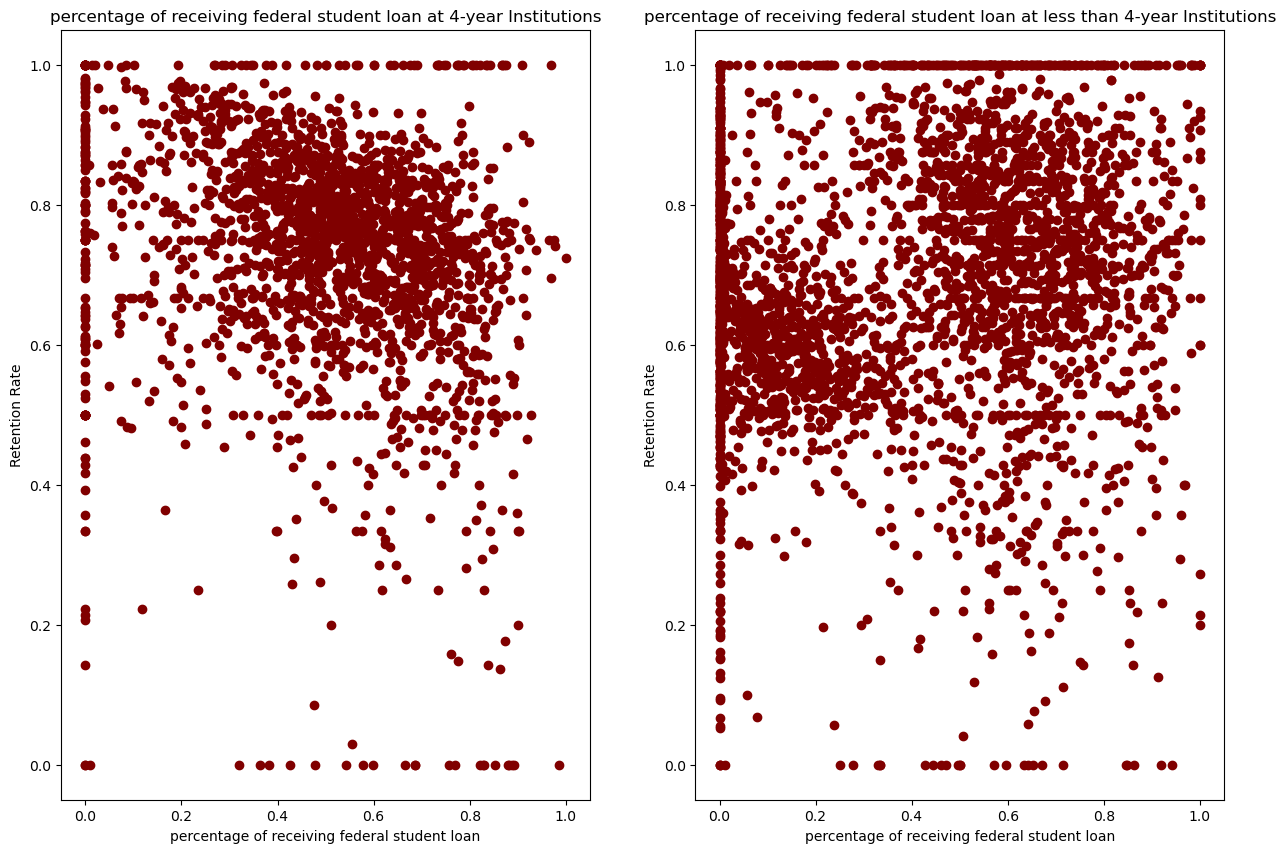

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10))
fig.suptitle('')

ax1.set_title('percentage of receiving federal student loan at 4-year Institutions')
ax1.set_xlabel('percentage of receiving federal student loan')
ax1.set_ylabel('Retention Rate')
ax1.scatter(percent_loan_data.PCTFLOAN, percent_loan_data.RET_FT4,color ='maroon')

ax2.set_title('percentage of receiving federal student loan at less than 4-year Institutions')
ax2.set_xlabel('percentage of receiving federal student loan')
ax2.set_ylabel('Retention Rate')
ax2.scatter(percent_loan_data.PCTFLOAN, percent_loan_data.RET_FTL4,color ='maroon')

plt.show()

In [14]:
## CONCLUSION